## Dian Pramesti
## PYTN-KS11-005
## Assignment Python 3
---


## Project Overview

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

- bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

- Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')


## Import Library

In [1]:
# for dataframe
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# for data exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler

# for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from six import StringIO
from IPython.display import Image
import sklearn.tree as DecisionTreeClassifier
import pydotplus
from sklearn import tree

# for ignove warning
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

menggunakan dataset bank-full.cvs

In [2]:
# Membaca dataset
# "";" digunakan sebagai pemisah untuk nilai-nilai pada setiap baris dalam file tersebut.
bankfull = pd.read_csv('/content/drive/MyDrive/msib/msib/bank-full.csv', sep=';')
bankfull

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Preprocessing

In [3]:
# Menampilkan ringkasan statistik deskriptif pada setiap kolom 
bankfull.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Menampilkan 5 data teratas
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Rename column y menjadi column target
bankfull = bankfull.rename(columns={'y':'target'})
bankfull

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Menampilkan 5 data terbawah
bankfull.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
# Mengetahui dimensi dataframe (baris, kolom)
bankfull.shape

(45211, 17)

In [8]:
# Mengetahui jumlah data yang duplikat 
bankfull.duplicated().sum()

0

In [9]:
# Mengetahui jumlah nilai yang hilang (null atau NaN) pada setiap kolom
bankfull.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [10]:
# Mendapatkan daftar kolom pada data
bankfull.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'target'],
      dtype=object)

In [11]:
# Mendapatkan daftar indeks pada data
bankfull.index.values

array([    0,     1,     2, ..., 45208, 45209, 45210])

In [12]:
# Menghitung nilai unik pada setiap kolom
bankfull.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
target          2
dtype: int64

In [13]:
# Memberikan informasi tentang dataframe (menampilkan jumlah baris dan kolom, jumlah nilai non-null setiap kolom, tipe data setiap kolom, jumlah memori yang digunakan)
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Exploratory Data Analysis 

## Data Visualization

Rumusan Masalah :

Bagaimana keputusan client untuk bergabung dengan program berlangganan deposito berjangka ini ?

In [14]:
# Melihat persentase jumlah masing-masing client terhadap program berlangganan deposito berjangka
dataclient = pd.DataFrame({"Total":bankfull['target'].value_counts(), 
                          "Presentase":(bankfull['target'].value_counts()/bankfull.shape[0])*100})
dataclient

,Total,Presentase
no,39922,88.30152
yes,5289,11.69848


sebesar 39922 client atau 88.3% dari total client memilih tidak bergabung, sedangkan 5289 client atau 11.7% dari total client memilih untuk bergabung pada program ini.



### Pie Chart

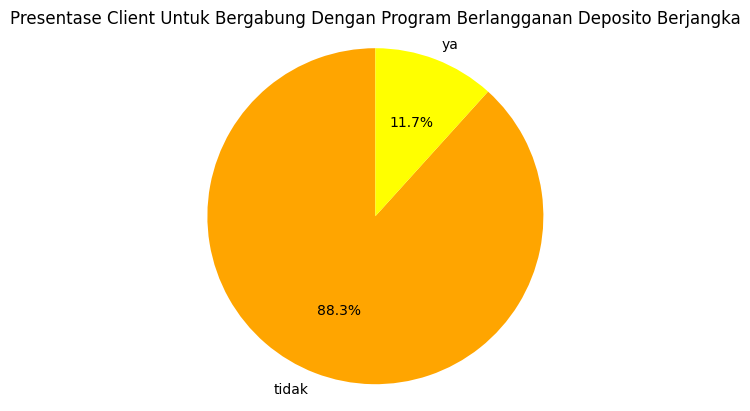

In [15]:
# Visualisasi data dengan pie chart
jumlah = dataclient['Total']
label = ['tidak','ya']

# Mengganti warna
warna = ['orange','yellow'] 

# Plot pie chart
plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90, colors=warna)

# Mengatur aspek proporsi pie chart menjadi sama agar terlihat bulat
plt.axis('equal')

# Menambahkan judul
plt.title('Presentase Client Untuk Bergabung Dengan Program Berlangganan Deposito Berjangka')

# Menampilkan pie chart
plt.show()


keterangan:

pada pie chart diatas sebesar 88.3% memilih tidak bergabung dengan program berlangganan deposito sedangkan 11.7% memilih bergabung.

## Bar Chart

In [16]:
bankfull['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Penggolongan Client Berdasarkan Marital')

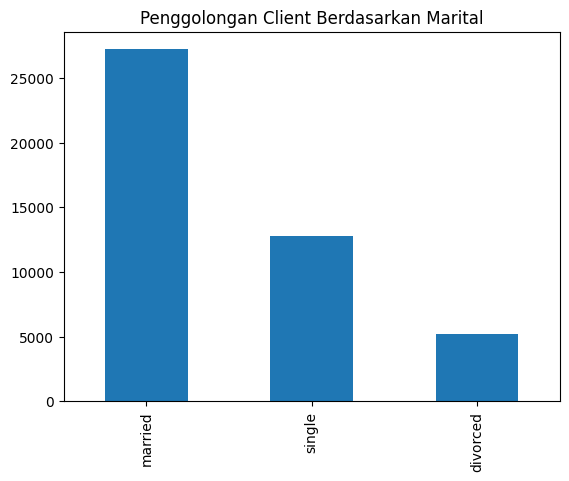

In [17]:
bankfull['marital'].value_counts().plot(kind='bar')
plt.title('Penggolongan Client Berdasarkan Marital')

Jumlah client yang marrried adalah 27214 orang, single 12790 orang, dan divorced 5207 orang.

### Histogram

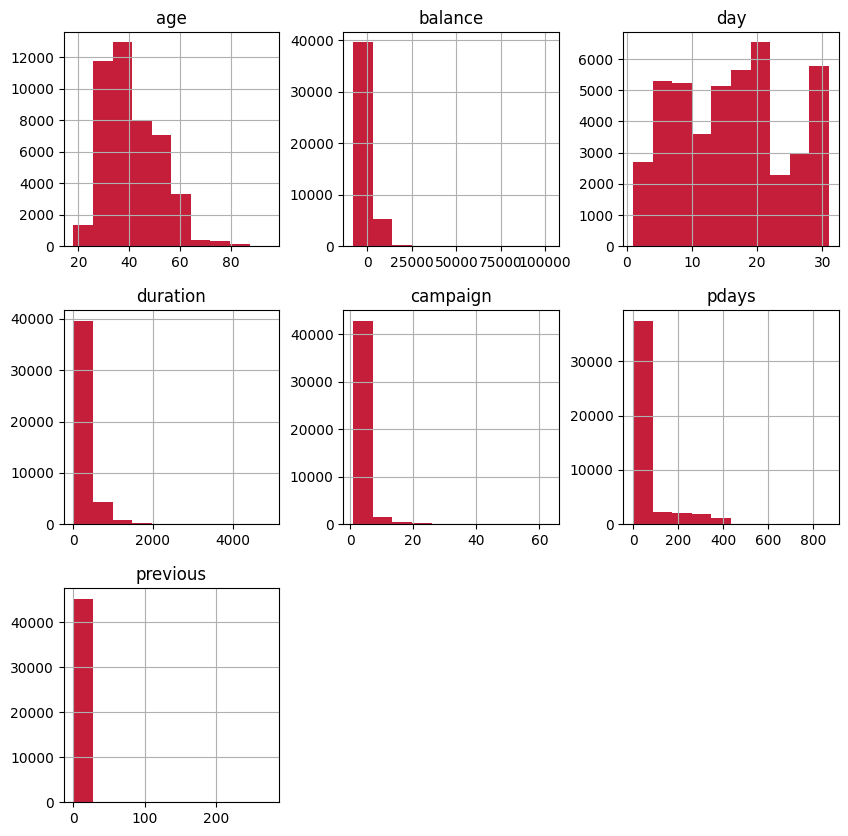

In [18]:
# histogram
bankfull.hist(figsize=(10,10), color='#C41E3A')
plt.show()

keterangan:

- Age: client yang bergabung berada di umur 18-95 tahun
- Balance: nilai balance tertinggi yaitu 102127
- Day: dimulai dari tanggal 1-31
- Duration: durasi tertinggi adalah 4918
- Campaign: nilai terendah adalah 1
- Pdays: pdays tertinggi 871
- Previous: nilai tertinggi 275

**Encoding Data Columns**

dikarenakan banyak tipe data object kita ubah dulu menjadi numerik agar mempermudah nantinya.

In [19]:
#creating labelEncoder

# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di dfbank
df_category = bankfull.select_dtypes(include='object')
dfbank = bankfull.copy()

for column in df_category.columns:
    dfbank[column] = label_encoder.fit_transform(bankfull[column])

In [20]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


tipe data yang awalnya object berubah menjadi int.

In [21]:
dfbank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


**Standardization**

Kita perlu melakukan standardization atau standarisasi pada data diatas. Setiap nilai pada kolom-kolom numerik diubah menjadi skor Z, yaitu nilai yang dihitung dengan mengurangi rata-rata kolom dan kemudian membagi dengan standar deviasi kolom. Tujuan dari scaling adalah untuk menghasilkan distribusi nilai yang lebih normal, dengan nilai-nilai yang tidak terlalu jauh dari rata-rata sehingga mempermudah analisis data lebih lanjut.

In [22]:
# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()
scale_df = dfbank.copy()

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada scale_df.
numeric_df = bankfull.select_dtypes(include=['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(bankfull[column].values.reshape(-1,1))

In [23]:
scale_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


### Heatmap Plot

Jenis plot yang menunjukkan korelasi antara dua variabel dengan warna-warna yang berbeda. Pada heatmap, warna yang lebih terang menunjukkan korelasi yang lebih kuat, sementara warna yang lebih gelap menunjukkan korelasi yang lebih lemah.

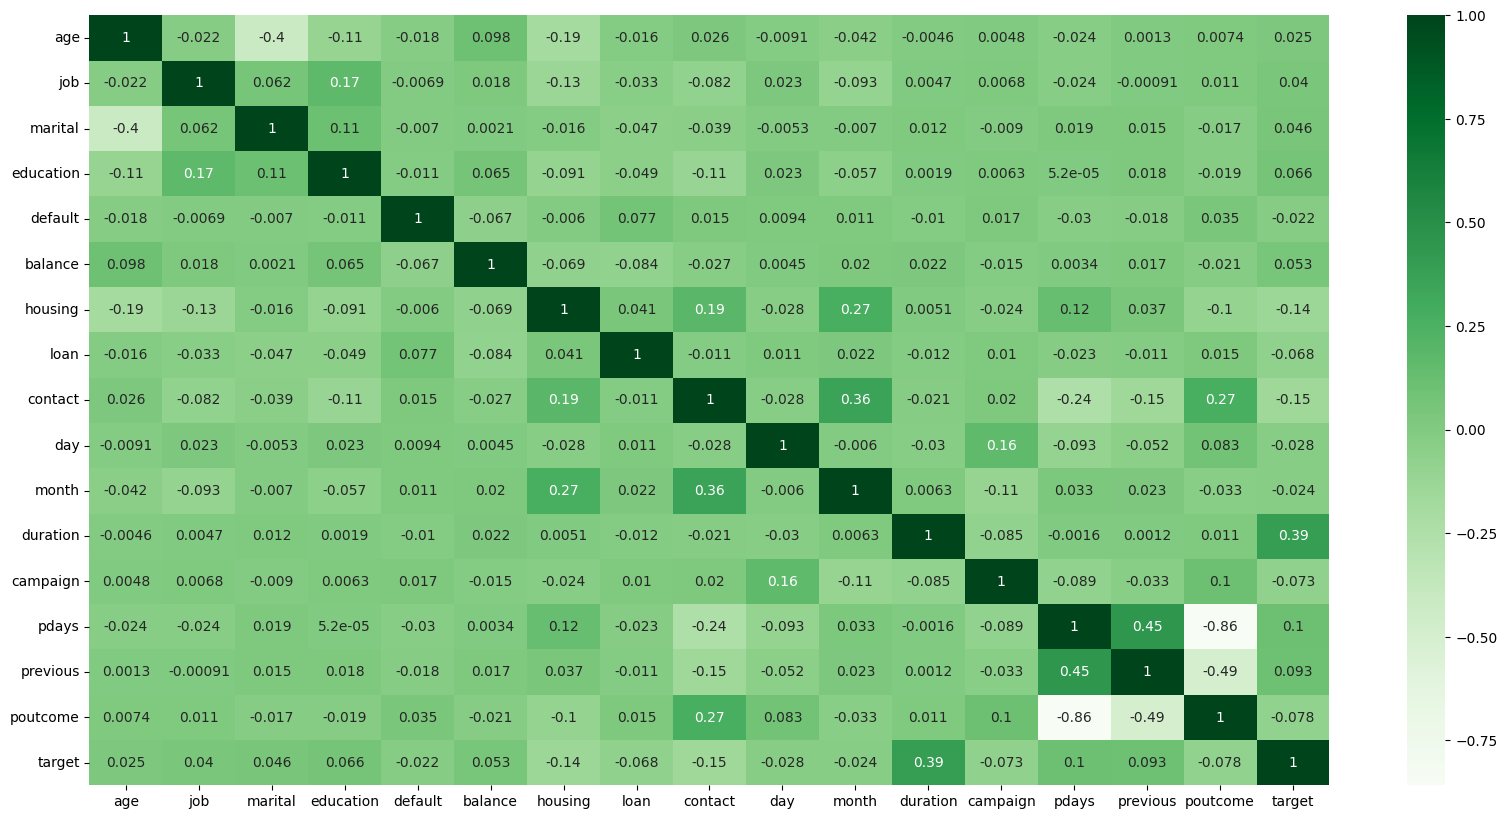

In [24]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(scale_df.corr(), annot=True, cmap="Greens")

Berdasarkan visualisasi di atas, apabila ada warna kotaknya lebih terang maka korelasinya lebih kuat, sementara warna yang lebih gelap menjunkan korelasi yang lemah. Dapat dilihat bahwa balance mempunyai hubungan linear positif yang sangat kuat dengan age jika dibandingkan yang lain.

In [25]:
# menghitung matriks korelasi antar kolom pada dataframe bankfull
scale_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


 **Model Machine Learning yang akan di buat yaitu :**
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

### Confusion Matrix

Matriks yang digunakan untuk mengevaluasi performa suatu model klasifikasi pada data testing. Confusion matrix digunakan untuk menghitung berapa banyak data yang benar atau salah diprediksi oleh model sebagai kelas positif atau negatif. Confusion matrix memiliki 4 jenis metrik evaluasi, yaitu:
- True Positive (TP): Jumlah data yang benar diprediksi sebagai kelas positif.
- True Negative (TN): Jumlah data yang benar diprediksi sebagai kelas negatif.
- False Positive (FP): Jumlah data yang salah diprediksi sebagai kelas positif.
- False Negative (FN): Jumlah data yang salah diprediksi sebagai kelas negatif.

Berdasarkan data ini
- TP merupakan client yang diprediksi bergabung dengan program berlangganan deposito berjangka dan benar benar bergabung.
- TN merupakan client yang diprediksi tidak bergabung dengan program berlangganan deposito berjangka namun kenyataannya bergabung.
- FP merupakn client yang diprediksi bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya tidak bergabung.
- FN merupakan client yang di prediksi tidak bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya bergabung.

### Logistic Regression

Digunakan untuk menganalisis hubungan antara variabel dependen dan variabel independen, dan digunakan untuk memprediksi nilai probabilitas dari sebuah kejadian yang bersifat biner (ya atau tidak, benar atau salah, sukses atau gagal).

In [26]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X = scale_df.drop('target', axis=1)
y = scale_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =1)


In [27]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,-0.841558,1,1,1,1,-0.525587,1,0,2,1.344997,8,0.655614,-0.569351,-0.411453,-0.251940,3
12403,-0.653211,0,2,1,0,-0.604412,1,1,2,1.344997,6,-0.571452,0.399020,-0.411453,-0.251940,3
21645,-0.841558,9,1,1,0,-0.360055,1,0,0,0.383734,1,-0.350114,-0.246560,-0.411453,-0.251940,3
29580,-0.464863,1,1,1,1,-0.443150,0,1,0,-1.538792,3,-0.420010,0.399020,-0.411453,-0.251940,3
31245,-1.689124,8,2,1,0,-0.287799,0,0,0,-1.538792,7,-0.664647,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.853573,9,1,2,0,0.153619,0,0,0,-0.217055,8,0.232354,0.076230,-0.411453,-0.251940,3
32511,-0.653211,4,0,2,0,-0.274005,1,0,0,0.143418,0,-0.097711,-0.246560,-0.411453,-0.251940,3
5192,0.665225,4,1,2,0,0.929056,0,0,2,0.624050,8,0.407094,1.044601,-0.411453,-0.251940,3
12172,0.382703,0,1,3,0,0.138182,0,0,2,0.503892,6,-0.959764,2.658552,-0.411453,-0.251940,3


In [28]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3610,0.100181,1,1,0,0,0.379911,1,0,2,-0.096898,8,0.014899,0.399020,-0.411453,-0.251940,3
11677,-0.370689,9,1,1,0,0.278096,0,0,2,0.503892,6,-0.353997,-0.246560,-0.411453,-0.251940,3
33018,-0.841558,0,1,1,0,-0.144273,1,0,0,0.143418,0,2.177796,0.399020,-0.411453,-0.251940,3
44323,1.136095,1,1,0,0,-0.346918,0,0,0,1.465155,5,0.504172,0.076230,1.406227,0.182198,2
8119,-0.841558,9,2,2,0,-0.363011,1,0,2,-1.658950,6,-0.291867,0.721811,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,-0.182341,0,1,1,0,0.173653,0,0,2,0.143418,6,-0.431659,-0.569351,-0.411453,-0.251940,3
28752,0.571051,10,2,2,0,0.373671,0,0,0,1.705471,4,-0.070529,-0.569351,-0.411453,-0.251940,3
22657,-0.935732,4,2,2,0,-0.447419,0,0,0,1.104681,1,-0.260802,0.721811,-0.411453,-0.251940,3
12529,0.853573,4,1,1,0,-0.445777,0,0,2,-1.538792,5,-0.909283,-0.569351,-0.411453,-0.251940,3


In [29]:
y_train

6149     0
12403    0
21645    0
29580    0
31245    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: target, Length: 31647, dtype: int64

In [30]:
y_test

3610     0
11677    0
33018    0
44323    1
8119     0
        ..
10811    0
28752    0
22657    0
12529    0
44850    1
Name: target, Length: 13564, dtype: int64

In [31]:
# Membuat objek Logistic Regression
lr = LogisticRegression()

# Melatih model pada data training
lr.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
lrpred = lr.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracylr = accuracy_score(y_test, lrpred)
print("Akurasi Logistic Regression:", accuracylr)

Akurasi Logistic Regression: 0.8910350928929519


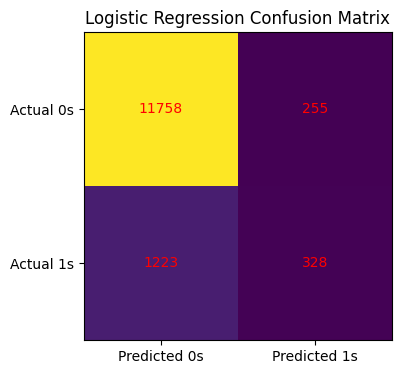

In [32]:
#  Confusion Matrix

cm = confusion_matrix(y_test, lrpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Logistic Regression Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 328, FP = 255, FN = 1223, TN = 11758

In [33]:
print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.56
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.21
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.31
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total = 0.89.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.
  
  macro avg precision = (0.91 + 0.56) / 2 = 0.73

  macro avg recall = (0.98 + 0.21) / 2 = 0.60

  macro avg F1-score = (0.94 + 0.31) / 2 = 0.62
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = (0.91 * 12013 + 0.56 * 1551) / 13564 = 0.87

  weighted avg recall = (0.98 * 12013 + 0.21 * 1551) / 13564 = 0.89

  weighted avg F1-score = (0.94 * 12013 + 0.31 * 1551) / 13564 = 0.87

  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.89.

### K-Nearest Neighbour

K-Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. KNN mencari K tetangga terdekat dari titik data yang baru dan menentukan kelas atau nilai regresi untuk titik data baru berdasarkan mayoritas dari K tetangga terdekat tersebut.

In [34]:
# Membuat objek KNN dengan n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data training
knn.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
knnpred = knn.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracyknn = accuracy_score(y_test, knnpred)
print("Akurasi KNN :", accuracyknn)


Akurasi KNN : 0.8978914774402831


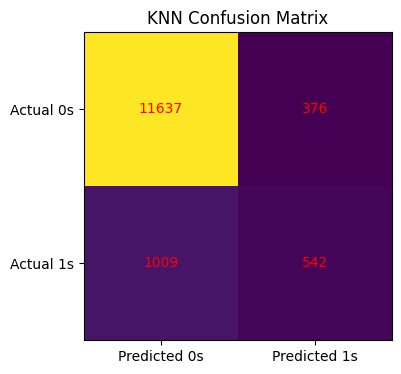

In [35]:
#  Confusion Matrix

cm = confusion_matrix(y_test, knnpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("KNN Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 498, FP = 351, FN = 1100, TN = 11615

In [36]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.59      0.35      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.59
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.31
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.41
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total  =  0.90.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.

  macro avg precision = 0.75
  
  macro avg recall = 0.64
  
  macro avg F1-score = 0.67
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = 0.87
  
  weighted avg recall = 0.89
  
  weighted avg F1-score = 0.88
  
  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.89.

Menghitung error rate atau tingkat kesalahan dalam model KNN yang dihasilkan, dengan menghitung rata-rata prediksi yang salah pada setiap nilai n_neighbors dari 1 hingga 40. Kemudian, nilai error rate ini dapat digunakan untuk memilih nilai optimal n_neighbors yang memberikan tingkat kesalahan terendah pada model KNN, sehingga memungkinkan model untuk memberikan prediksi yang lebih akurat

In [37]:
error = []

# kalkulasi eror untuk k_values between 1 dan 40

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

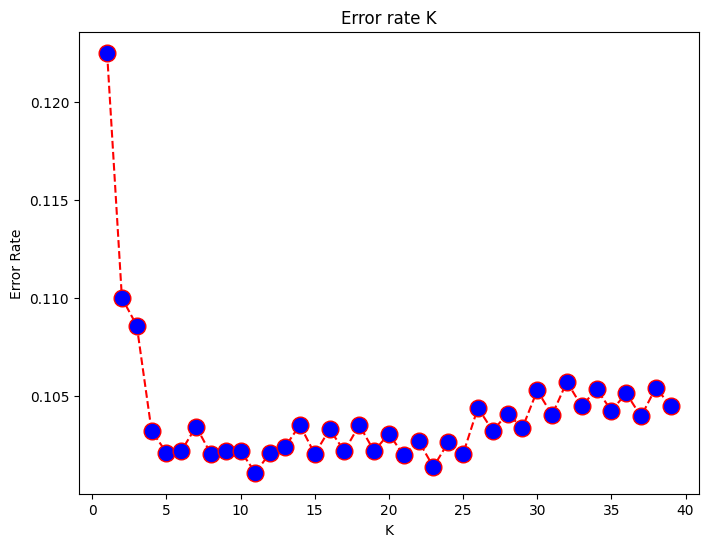

In [38]:
plt.figure(figsize=(8,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=12)
plt.title('Error rate K')
plt.xlabel('K')
plt.ylabel('Error Rate')

### SVM (Support Vector Machine)

Mencari sebuah hyperplane (bidang) yang terbaik memisahkan dua kelas pada data training dengan margin terbesar yang mungkin. Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas.



In [39]:
# Membuat objek SVM
svm = SVC(kernel='linear')

# Melatih model pada data training
svm.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
svmpred = svm.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracysvm = accuracy_score(y_test, svmpred)
print("Akurasi SVM:", accuracysvm)

Akurasi SVM: 0.8856531996461221


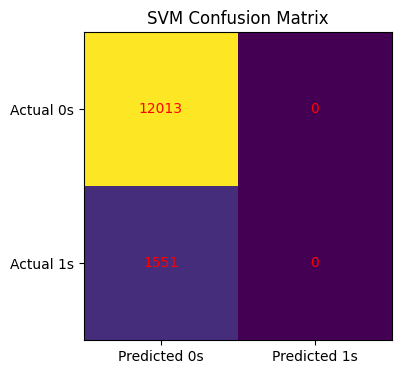

In [40]:
# Confusion Matrix

cm = confusion_matrix(y_test, svmpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("SVM Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 0,
FP = 0,
FN = 1551,
TN = 12013

In [41]:
print(classification_report(y_test, svmpred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.00      0.00      0.00      1551

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564



dikarenakan nilai True Positives (TP) dan False Positives (FP) sama-sama nol, maka precision tidak dapat dihitung dan hasilnya tidak terdefinisi (undefined). 
- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.00
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.00
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.00
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total  =  0.89.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.

  macro avg precision = 0.44
  
  macro avg recall = 0.50
  
  macro avg F1-score = 0.47
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = 0.78
  
  weighted avg recall = 0.89
  
  weighted avg F1-score = 0.83
  
  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.89.

### Decision Tree

Algoritma ini menghasilkan sebuah struktur pohon yang dapat digunakan untuk mengambil keputusan dengan menganalisis fitur-fitur pada data. Pada decision tree, setiap node pada pohon merepresentasikan sebuah fitur, sedangkan cabang-cabang pada node merepresentasikan kemungkinan nilai dari fitur tersebut. Node daun pada pohon merepresentasikan kelas atau nilai target.

In [42]:
from sklearn.tree import DecisionTreeClassifier
# Membuat objek Decision Tree
dtc = DecisionTreeClassifier()

# Melatih model pada data training
dtc.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
dtcpred = dtc.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracydtc = accuracy_score(y_test, dtcpred)
print("Akurasi Decision Tree:", accuracydtc)

Akurasi Decision Tree: 0.8725302270716603


### Visualisasi menggunakan Decision Tree

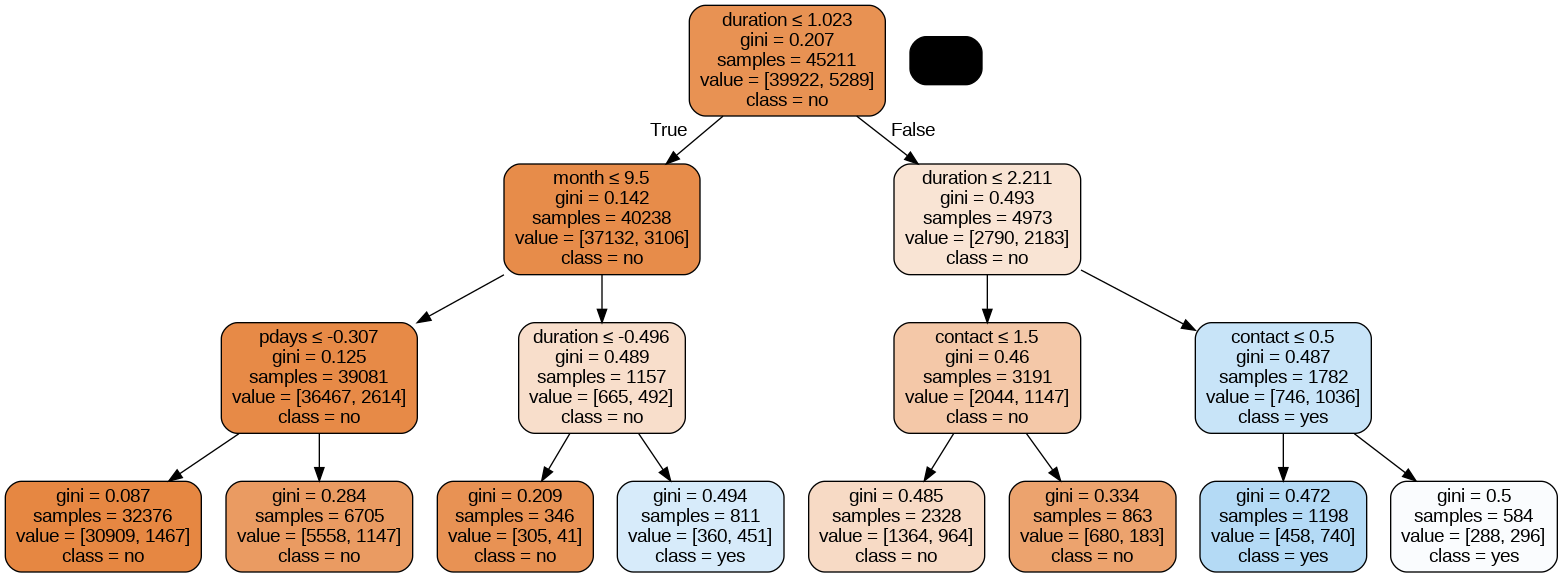

In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# max_depth adalah parameter yang menentukan kedalaman maksimum dari pohon keputusan.
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X, y)

dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

keterangan:

Pada diagram tersebut, setiap node merepresentasikan fitur atau atribut yang digunakan untuk membagi data menjadi subset yang lebih kecil. Pada akar pohon, model menggunakan fitur Duration untuk membagi data menjadi dua subset berdasarkan apakah nilai duration kurang dari atau sama dengan 1.023 atau lebih dari 1.023.

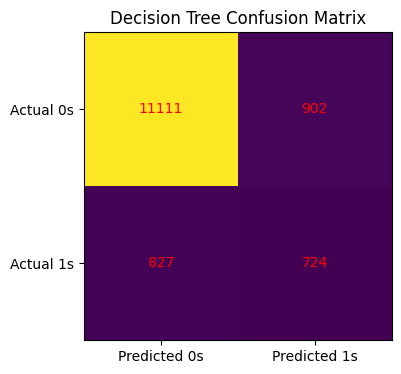

In [44]:
# Confusion Matrix

cm = confusion_matrix(y_test, dtcpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Decision Tree Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 708, FP = 902, FN = 843, TN = 11111

In [45]:
print(classification_report(y_test, dtcpred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12013
           1       0.45      0.47      0.46      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.88      0.87      0.87     13564



- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.44
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.46
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.45
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total  =  0.87.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.  

  macro avg precision = 0.68
  
  macro avg recall = 0.69
  
  macro avg F1-score = 0.69
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = 0.87
  
  weighted avg recall = 0.87
  
  weighted avg F1-score = 0.87
  
  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.87.

### Random Forest

Algoritma ini membangun beberapa pohon keputusan (decision tree) secara acak pada dataset dan kemudian menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan prediksi akhir.

In [46]:
# Membuat objek DRandom Forest dengan n_estimators=100
rf = RandomForestClassifier(n_estimators=100)

# Melatih model pada data training
rf.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
rfpred = rf.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracyrf = accuracy_score(y_test, rfpred)
print("Akurasi Random Forest:", accuracyrf)

Akurasi Random Forest: 0.9057800058979653


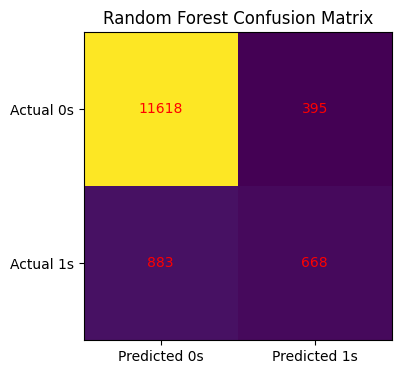

In [47]:
# Confusion Matrix

cm = confusion_matrix(y_test, rfpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 685, FP = 392, FN = 913, TN = 11574

In [48]:
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.64
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.43
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.51
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total  =  0.90.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.  

  macro avg precision = 0.78
  
  macro avg recall = 0.70
  
  macro avg F1-score = 0.73
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = 0.89
  
  weighted avg recall = 0.90
  
  weighted avg F1-score = 0.89
  
  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.90.

### Naive Bayes

Memanfaatkan teorema Bayes untuk menghitung probabilitas dari setiap kelas berdasarkan atribut yang ada pada data.

In [49]:
# Membuat objek naive bayes
nb = GaussianNB()

# Melatih model pada data training
nb.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
nbpred = nb.predict(X_test)

# Menghitung akurasi prediksi pada data testing
accuracynb = accuracy_score(y_test, nbpred)
print("Akurasi Naive Bayes:", accuracynb)

Akurasi Naive Bayes: 0.8347832497788263


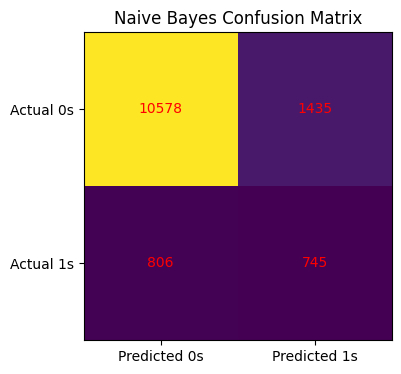

In [50]:
# Confusion Matrix

cm = confusion_matrix(y_test, nbpred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Naive Bayes Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

TP = 754, FP = 1492, FN = 844, TN = 10474

In [51]:
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     12013
           1       0.34      0.48      0.40      1551

    accuracy                           0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564



- Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.

  precision = true positives / (true positives + false positives) = 0.34
- Recall: fraksi dari client yang benar-benar diprediksi bergabung.

  recall =  true positives / (true positives + false negatives) = 0.47
- f1-score = harmonic mean dari precision dan recall.
  
  F1-score = 2 * precision * recall / (precision + recall) = 0.39
- Support: jumlah sampel yang termasuk dalam setiap kelas.
  
  support kelas 0 = 12013
  
  support kelas 1 = 1551
- Accuracy: fraksi dari prediksi yang benar secara keseluruhan.

  accuracy = (true positives + true negatives) / total  =  0.83.
- Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.  

  macro avg precision = 0.63
  
  macro avg recall = 0.67
  
  macro avg F1-score = 0.65
- Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

  weighted avg precision = 0.86

  weighted avg recall = 0.83
  
  weighted avg F1-score = 0.84
  
  Dari evaluasi tersebut, dapat dilihat bahwa model memiliki precision yang cukup rendah untuk kelas 1 (bergabung) dan recall yang rendah. Namun, model memiliki nilai accuracy yang cukup baik, yaitu 0.83.

In [52]:
bankfull['target'].value_counts()

no     39922
yes     5289
Name: target, dtype: int64

## Kesimpulan

In [53]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', accuracylr)
print('Akurasi K-Nearest Neighbors:', accuracyknn)
print('Akurasi Support Vector Machine:', accuracysvm)
print('Akurasi Decision Tree:', accuracydtc)
print('Akurasi Random Forest:', accuracyrf)
print('Akurasi Naive Bayes:', accuracynb)

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.8910350928929519
Akurasi K-Nearest Neighbors: 0.8978914774402831
Akurasi Support Vector Machine: 0.8856531996461221
Akurasi Decision Tree: 0.8725302270716603
Akurasi Random Forest: 0.9057800058979653
Akurasi Naive Bayes: 0.8347832497788263


- Sebanyak 39922 jumlah client belum menjadi nasabah dan 5289 client sudah menjadi nasabah di bank tersebut.
- Hasil akurasi algoritma yang paling sesuai untuk memprediksi apakah klien akan berlangganan atau tidak adalah algoritma **Random Forest** dikarenakan nilai akurasinya 90%.